In [2]:
from preprocessor import Preprocessor
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
from df_template import render_mpl_table
import numpy as np

In [3]:
df = pd.read_excel("Project 2 - Data.xls")
preprocessor=Preprocessor(df)
df= preprocessor.adjust_excel()

df.columns #columns
len(df) #number of records
defaults=df['DEFAULT_FLAG'].to_numpy()
np.sum(defaults) #number of defaults
558/5801


0.0961903120151698

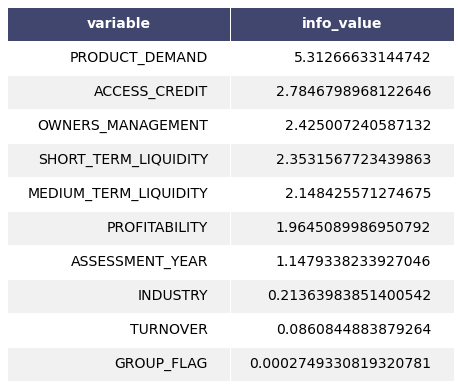

In [4]:
iv_table = sc.iv(df, 'DEFAULT_FLAG')
fig, ax = render_mpl_table(iv_table, col_width= 4.0)
fig.savefig("iv_table.png")

In [5]:
iv_table['variable']

6           PRODUCT_DEMAND
1            ACCESS_CREDIT
4        OWNERS_MANAGEMENT
9     SHORT_TERM_LIQUIDITY
8    MEDIUM_TERM_LIQUIDITY
7            PROFITABILITY
2          ASSESSMENT_YEAR
3                 INDUSTRY
0                 TURNOVER
5               GROUP_FLAG
Name: variable, dtype: object

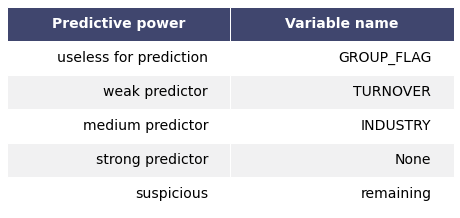

In [6]:
data = [['useless for prediction', 'GROUP_FLAG'], ['weak predictor', 'TURNOVER'], ['medium predictor', 'INDUSTRY'], ['strong predictor','None'],['suspicious','remaining']]
predictor_table = pd.DataFrame(data, columns = ['Predictive power', 'Variable name'])
fig, ax = render_mpl_table(predictor_table, col_width= 4.0)
fig.savefig("predictor_table.png")

In [7]:
from logistic_regression import score as log_regr_score
from implied_model import score as implied_score
from linear_regression import score as linear_score
from probit_regression import score as probit_score

values=[]
values.append(log_regr_score)
values.append(probit_score)
values.append(implied_score)
values.append(linear_score)

[INFO] filtering variables ...
[INFO] creating woe binning ...
Binning on 4640 rows and 10 columns in 00:00:10
[INFO] converting into woe values ...
[INFO] converting into woe values ...
Total defaults in test data:  112.0
0.9397071490094746
Index(['PRODUCT_DEMAND', 'OWNERS_MANAGEMENT', 'ACCESS_CREDIT', 'PROFITABILITY',
       'SHORT_TERM_LIQUIDITY', 'MEDIUM_TERM_LIQUIDITY', 'DEFAULT_FLAG'],
      dtype='object')
recall: 0.9038096879848302
precision: inf
Score: 0.9038096879848302


C:\Users\czako\PycharmProjects\credit_scorecard_project\implied_model.py:60: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(true_positive, true_positive + false_positive)


[INFO] filtering variables ...
[INFO] creating woe binning ...
Binning on 4640 rows and 10 columns in 00:00:10
[INFO] converting into woe values ...
[INFO] converting into woe values ...
[ 0.44585972  0.10272646 -0.05714388 ...  0.12712597  0.02330365
 -0.08141898]
0.4723158630695564
[INFO] filtering variables ...
[INFO] creating woe binning ...
Binning on 4640 rows and 10 columns in 00:00:11
[INFO] converting into woe values ...
[INFO] converting into woe values ...
Optimization terminated successfully.
         Current function value: 0.229451
         Iterations 7
Predicted number of defaults 196
Score: 0.917312661498708


[0.9397071490094746, 0.917312661498708, 0.9038096879848302, 0.4723158630695564]


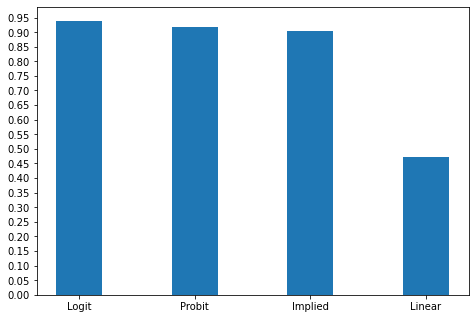

In [14]:
print(values)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.yticks(np.arange(0,1,0.05))

models = ['Logit', 'Probit','Implied', 'Linear']
scores=values
ax.bar(models,scores,width=0.4)

plt.show()
